In [ ]:
from google.colab import files
data=files.upload()

Saving lang_detect_dataset2.csv to lang_detect_dataset2 (1).csv


In [ ]:
import sys


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import translate
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("lang_detect_dataset2.csv")

In [ ]:
data.sample(10)

,Text,Language
6065,Основатели Википедии — Ларри Сэнгер и Джимми У...,Russian
3913,disons que vous avez beaucoup de devoirs et qu...,French
2716,"[123] Na prática, a Wikipédia é defendida de a...",Portugeese
8601,[100] Som en av internets största samarbetspro...,Sweedish
911,These robots use guidance mechanisms such as a...,English
8106,şimdi.,Turkish
1616,ഹേയ് എന്തുകൊണ്ടാണ് നിങ്ങൾ ഞങ്ങളുമായി ഹാംഗ് out...,Malayalam
2995,Eu sinto Muito.,Portugeese
4607,Ik heb het verpest.,Dutch
9220,Wie ist es dir gegangen?,German


In [ ]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
X = data["Text"]
Y = data["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9\[\]]', '', text)
    text = text.lower()
    data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f'accuracy = {round(ac * 100, 2)} %')

accuracy = 97.91 %


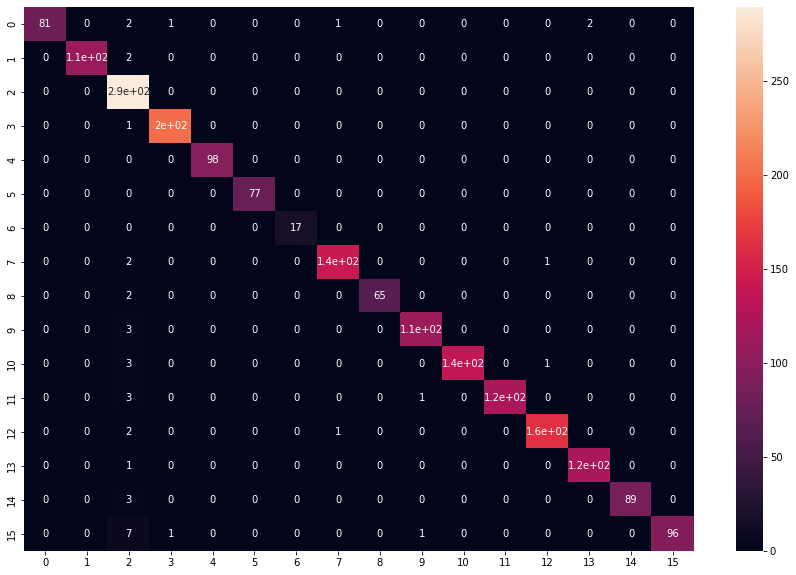

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    
    print(f'The text is in {lang[0]} language')

In [ ]:
predict("Skeletor aparece vandalizando el artÃ­culo de He-Man.")


The text is in Spanish language


In [ ]:
predict("Woah This Works")

The text is in English language


In [ ]:
predict("il mio nome è huzaifah")

The text is in Italian language


In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

from googletrans import Translator

translator = Translator()

from translate import Translator
translator= Translator(to_lang="de")
translation = translator.translate("This is a pen.")
print(translation)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Das ist ein Gehege.


In [ ]:
from googletrans import Translator, constants
from pprint import pprint


In [ ]:
!pip install translate
!pip install googletrans==3.1.0a0

Found existing installation: googletrans 3.1.0a0
Uninstalling googletrans-3.1.0a0:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.7/dist-packages/googletrans-3.1.0a0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/googletrans/*
Proceed (y/n)?   ERROR: Operation cancelled by user


In [ ]:
from googletrans import Translator, constants
from pprint import pprint
translator = Translator()
translation = translator.translate("Hola Mundo", dest="ar")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

Hola Mundo (es) --> مرحبا بالعالم (ar)
